# Relatório do Segundo Trabalho
***
### Disciplina: (COMP0427) Inteligência Artificial
### Professor: Dr. Hendrik Texeira Macedo
### Participantes e tarefa responsável:
- Arianne Macena (Naive Bayes)
- Adam Silva (Naive Bayes)
- Fabiana Barreto (Decision Tree)
- Rodrigo Otsuka (Decision Tree)
- Valmir Jr.(Amostragem)
- Welerson Melo (Amostragem)
***

### Rede bayesiana escolhida: [ChestClinic](https://www.norsys.com/netlibrary/index.htm)
![Bayesian Network ChestClinic](https://raw.githubusercontent.com/AkioCode/IAProjeto2/dev/img/chestClinic.png "Logo Title Text 1")
* Característica de classe: Dispnéia
* A amostragem foi separada em amostra de treino (70%) e de teste (30%)
***

In [1]:
#Importações
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import graphviz
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve

## 1. Processo de amostragem
    
    Algoritmo: PriorSampling
    Para usar o PriorSampling foi feita a conversão da Rede acima de forma que a rede se transformasse num array de dependências para cada nó e um array com as probabilidades relacionadas às tabelas condicionais de cada nó da rede.
    Em seguida o código do algoritmo PriorSample usando a library citada no parágrafo anterior.
***

In [2]:
#####################################################
# Chest Clinic Bayes net representatin  library     # 
#####################################################

#Ordem seguida pelo prior: Visitou Asia(Sim,Nao); Fuma(Sim,Nao); Tuberculose(Sim,Nao); Cancer Pulmao(Sim,Nao); Bronquite(Sim,Nao); Tuberculose ou Cancer(VERDADE, FALSO); RaioX(Normal,Abnormal); Dispneia(Sim,Nao); -> Nó(1,0)

#Definindo quais dos nós será a classe para o aprendizado
classe = 7

#Relacao de dependência entre os nós (ordem de prioridade):
d = []
d.append([])  	# 0:Visit Asia
d.append([])  	# 1:Fuma
d.append([0]) 	# 2:Turbeculos <- Visit Asia 
d.append([1]) 	# 3:Cancer Pulmao <- Fuma
d.append([1]) 	# 4:Bronquite <- Fuma
d.append([2, 3])# 5:Turbe. ou Cancer. <- Turbe., Cancer.
d.append([5]) 	# 6:RaioX <- 5
d.append([5, 4])# 7:Dispinea <- Tuber. ou Cancer. , Bronquite

#probabilidades positivas para os 8 nós (inteiro de 1 a 100)
#A probabilidade será recursiva para dentro da tupla de acordo com a quantidade de dependências sendo primeiro valor a negacao da condicao
# ex: uma dependência, p[k] = ((-, +)), k dependendo de j então quando j for - pega-se p[k][0], e vice versa.
# para duas dependências p[k] = ((--, -+), (+-, ++))


# Probabilidades
p = [0,1,2,3,4,5,6,7] # inicializando 8 nós
p[0] = 1
p[1] = 50
p[2] = (1, 5) 
p[3] = (1, 10)
p[4] = (30, 60)
p[5] = ((0, 100), (100, 100))
p[6] = (95, 2)
p[7] = ((10, 80), (70, 90))

def getDepencies():
    return d

def getProbabilities():
    return p

def getClass():
    return classe

In [3]:
#####################################################
# Prior Sample Algorithm						 	# 
#####################################################

import sys
import bayesnetrepresentation as bnr

def generateSample(d, p):
    # x é o próximo sample
    x = [-1 for _ in range(len(p))] #-1 é quando não foi colocado valor algum ainda, 1 é a afirmação, 0 negacao
    for i in range(len(x)):
        prob = p[i]
        for noD in d[i]:
            prob = prob[x[noD]]
        #prob positiva atualizada do no i dado as denpendencias d[i]
        randNum = randint(0, 100)
        if randNum <= prob:
            x[i] = 1
        else:
            x[i] = 0
    return x

def swapPosition(samples, index):
    ##### Colocar código swap aqui para todos os items de samples
    return samples
def mostrarPorcentagens(samples):
    contAsia, contFuma, contTuber, contCan, contBronq, contOU, contRaio, contDisp = 0, 0, 0, 0, 0, 0, 0, 0
    for i in range(len(samples)):
        if samples[i][0] == 1:
            contAsia += 1
        if samples[i][1] == 1:
            contFuma += 1
        if samples[i][2] == 1:
            contTuber += 1
        if samples[i][3] == 1:
            contCan += 1
        if samples[i][4] == 1:
            contBronq += 1
        if samples[i][5] == 1:
            contOU += 1
        if samples[i][6] == 1:
            contRaio += 1
        if samples[i][7] == 1:
            contDisp += 1

    #esses prints eram so pra testes
    print("Visitou Asia --------->","%.0f" %((contAsia/len(samples))*100),"% das amostras")
    print("Fuma ----------------->","%.0f" %((contFuma/len(samples))*100),"% das amostras")
    print("Tuberculose ---------->","%.0f" %((contTuber/len(samples))*100),"% das amostras")
    print("Cancer Pulmao -------->","%.0f" %((contCan/len(samples))*100),"% das amostras")
    print("Bronquite ------------>","%.0f" %((contBronq/len(samples))*100),"% das amostras", 10)
    print("Tuberculose ou Cancer->","%.0f" %((contOU/len(samples))*100),"% das amostras", 10)
    print("RaioX ---------------->","%.0f" %((contRaio/len(samples))*100),"% das amostras")
    print("Dispneia ------------->","%.0f" %((contDisp/len(samples))*100),"% das amostras")

def salvarSamples(samples):
    arquivo = open('samplesTESTANDO.txt', 'w')
    for x in samples:
        linha = '';
        for val in x:
            linha += str(val) + ","
        linha = linha[:-1]
        linha += "\n"
        arquivo.write(linha)
    arquivo.close()

#### main program ####
if __name__ == '__main__':
    numberOfSample = int(sys.argv[1])
    d = bnr.getDepencies()
    p = bnr.getProbabilities()
    classIndex = bnr.getClass()
    
    samples = []
    while(numberOfSample > 0):
        samples.append(generateSample(d, p))
        numberOfSample-=1
    if len(samples[0])-1 != classIndex:
        #troca ultima posicao de cada sample pela possicao q esta a classe (classIndex)
        samples = swapPosition(samples, classIndex)	

    salvarSamples(samples)

ModuleNotFoundError: No module named 'bayesnetrepresentation'

### 1.1 Justificativa de escolha da quantidade de samples gerada
        A partir dos valores reais de probabilidade dado na rede disponível no site, escolheremos a 
    quantidade de sample baseado no valor do erro de cada característica (nó da rede) acumulado. 
    O erro acumulado E é o valor absoluto de cada probabilidade da amostra Pa_i menos cada valor
    de probabilidade original Po_i, i.e., E = SOMATÓRIO(|Pa_i - Po_i|)
    Foi pego o melhor erro E de 3 rodadas de amostras geradas para cada um dos testes abaixo.
        
        Baseado nos valores expostas abaixo, decidimos que 10000 amostras, com E = 10, são suficiente
    para representar de forma satisfatória a rede dada.
    Segue abaixo o experimento:
    
    Valores Reais das amostras, para o caso positivo em todos os nós:

    Visitou Asia ---------> 1 % das amostras
    Fuma -----------------> 50 % das amostras
    Tuberculose ----------> 1 % das amostras
    Cancer Pulmao --------> 5 % das amostras
    Bronquite ------------> 45 % das amostras
    Tuberculose ou Cancer-> 6 % das amostras
    RaioX ----------------> 89 % das amostras
    Dispneia -------------> 43 % das amostras
    
    Teste 1, 100 amostras:
    
    Visitou Asia ---------> 1 % das amostras
    Fuma -----------------> 55 % das amostras
    Tuberculose ----------> 0 % das amostras
    Cancer Pulmao --------> 6 % das amostras
    Bronquite ------------> 39 % das amostras 
    Tuberculose ou Cancer-> 9 % das amostras 
    RaioX ----------------> 83 % das amostras
    Dispneia -------------> 37 % das amostras

    E = 28
    
    Teste 2, 1000 amostras:
    
    Visitou Asia ---------> 2 % das amostras
    Fuma -----------------> 50 % das amostras
    Tuberculose ----------> 2 % das amostras
    Cancer Pulmao --------> 7 % das amostras
    Bronquite ------------> 44 % das amostras
    Tuberculose ou Cancer-> 9 % das amostras
    RaioX ----------------> 87 % das amostras
    Dispneia -------------> 44 % das amostras

    E = 11
    
    Teste 3, 10000 amostras:
    
    Visitou Asia ---------> 2 % das amostras
    Fuma -----------------> 50 % das amostras
    Tuberculose ----------> 2 % das amostras
    Cancer Pulmao --------> 6 % das amostras
    Bronquite ------------> 45 % das amostras 
    Tuberculose ou Cancer-> 9 % das amostras 
    RaioX ----------------> 87 % das amostras
    Dispneia -------------> 45 % das amostras

    E = 10

    Teste 4, 100000 amostras:
    
    Visitou Asia ---------> 2 % das amostras
    Fuma -----------------> 50 % das amostras
    Tuberculose ----------> 2 % das amostras
    Cancer Pulmao --------> 6 % das amostras
    Bronquite ------------> 46 % das amostras 
    Tuberculose ou Cancer-> 9 % das amostras 
    RaioX ----------------> 87 % das amostras
    Dispneia -------------> 45 % das amostras

    E = 11

    Teste 5, 1000000 amostras:
    
    Visitou Asia ---------> 2 % das amostras
    Fuma -----------------> 50 % das amostras
    Tuberculose ----------> 2 % das amostras
    Cancer Pulmao --------> 6 % das amostras
    Bronquite ------------> 46 % das amostras 
    Tuberculose ou Cancer-> 9 % das amostras 
    RaioX ----------------> 86 % das amostras
    Dispneia -------------> 46 % das amostras

    E = 13

***


In [4]:
# Carregamento da amostra
path1k = r"codes/sample generator/amostras1000.csv"; 

df_chest1k = pd.read_csv(path1k, header=None)
df_chest1k.columns = ['Visita Asia', 'Fuma', 'Tuberculose', 'Cancer Pulmao', 
'Bronquite', 'Tuberculose ou Cancer', 'RaioX', 
'Dispneia']

# Separação da amostra
X1k, y1k = train_test_split(df_chest1k, test_size=0.3, random_state=0)

X1k_train = X1k[X1k.columns[:7]]
X1k_test = y1k[y1k.columns[:7]]
y1k_train = X1k['Dispneia']
y1k_test = y1k['Dispneia']

# Lista de features
feat_labels = df_chest1k.columns

***

In [5]:
#Funções auxiliares

#  Accuracy é a nível de precisão do classificador
#  Precision é a habilidade do classificador não rotular uma amostra correta como incorreta;
#  Recall é a habilidade do classificador de achar todas as amostras corretas;
def printScores(alg_name, test_target, test_predict):
    scores = {" - Accuracy": accuracy_score(test_target, test_predict)*100,
              " - Precision": precision_score(test_target, test_predict)*100,
              " - Recall": recall_score(test_target, test_predict)*100}
    
    print("Classification metrics from " + alg_name)
    
    for key, value in scores.items():
        print("{}: {:.2f}%".format(key, value))
        

#reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

***
## 2. Naive Bayes

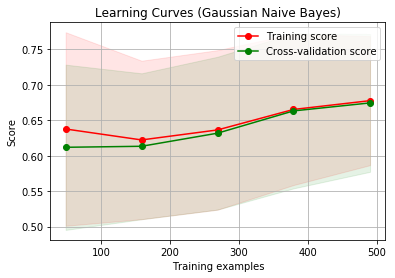

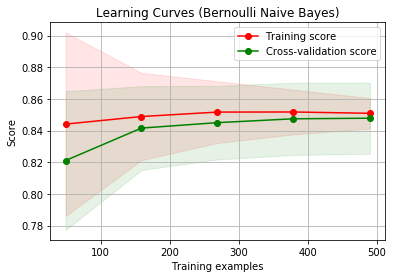

In [6]:
#Instanciação do modelo guassian naive bayes
modelGaussian = GaussianNB()
modelGaussian.fit(X1k_train, y1k_train)

#Instanciação do modelo bernoulli naive bayes
modelBernoulli = BernoulliNB()
modelBernoulli.fit(X1k_train, y1k_train)

#Gráficos de curva de aprendizado de comparação de pontuação de treinamento e validação de pontuação de ambas instâncias
title = "Learning Curves (Gaussian Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
plot_learning_curve(modelGaussian, title, X1k_train, y1k_train, None, cv)
title = "Learning Curves (Bernoulli Naive Bayes)"
plot_learning_curve(modelBernoulli, title, X1k_train, y1k_train, None, cv)
plt.show()

### 2.1 Cálculo e exibição de dados de perfomance de classificação

Classification metrics from Naive-Bayes (using Gaussian algorithm)
 - Accuracy: 75.33%
 - Precision: 75.93%
 - Recall: 63.08%
Classification metrics from Naive-Bayes (using Bernoulli algorithm)
 - Accuracy: 83.33%
 - Precision: 77.40%
 - Recall: 86.92%


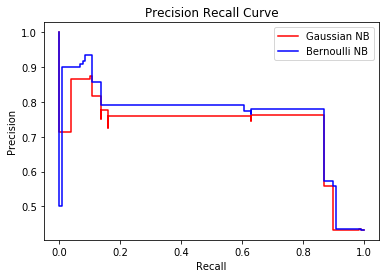

In [7]:
printScores("Naive-Bayes (using Gaussian algorithm)", y1k_test , modelGaussian.predict(X1k_test))
printScores("Naive-Bayes (using Bernoulli algorithm)", y1k_test, modelBernoulli.predict(X1k_test))

GaussianNB_prob = modelGaussian.predict_proba(X1k_test)
GaussianNB_prob_prec, GaussianNB_prob_recall, _ = precision_recall_curve(y1k_test, GaussianNB_prob[:,1])

BernoulliNB_prob = modelBernoulli.predict_proba(X1k_test)
BernoulliNB_prob_prec, BernoulliNB_prob_recall, _ = precision_recall_curve(y1k_test, BernoulliNB_prob[:,1])

plt.step(GaussianNB_prob_recall, GaussianNB_prob_prec, color='r', where='post')
plt.step(BernoulliNB_prob_recall, BernoulliNB_prob_prec, color='b', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(('Gaussian NB', 'Bernoulli NB'))
plt.show()

### 2.2 Cálculo e exibição da acurácia sem smoothing

In [8]:
# var_smoothing: parte da maior variância de todas as variáveis que são adicionadas às variancias da função 
#                para calcular a estabilidade
modelGaussian = GaussianNB(var_smoothing = 0)
modelGaussian.fit(X1k_train, y1k_train)

# alpha: parâmetro smoothing da função
modelBernoulli = BernoulliNB(alpha = 0)
modelBernoulli.fit(X1k_train, y1k_train)

printScores("Naive-Bayes (using Gaussian algorithm without smoothing)", y1k_test , modelGaussian.predict(X1k_test))
printScores("Naive-Bayes (using Bernoulli algorithm without smoothing)", y1k_test, modelBernoulli.predict(X1k_test))

Classification metrics from Naive-Bayes (using Gaussian algorithm without smoothing)
 - Accuracy: 75.33%
 - Precision: 75.93%
 - Recall: 63.08%
Classification metrics from Naive-Bayes (using Bernoulli algorithm without smoothing)
 - Accuracy: 83.33%
 - Precision: 77.40%
 - Recall: 86.92%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


***
## 3. Árvore de decisão & Floresta aleatória

### 3.2. Floresta Aleatória

In [9]:
forest = RandomForestClassifier(n_estimators=10000,
                                criterion='entropy',
                                max_features='sqrt',
                                random_state=0,
                                n_jobs=-1)

forest.fit(X1k_train, y1k_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### 3.2.1 Exibição e plotagem de dados 

 1) Bronquite                      0.796489
 2) Fuma                           0.068549
 3) Tuberculose ou Cancer          0.051141
 4) RaioX                          0.037252
 5) Cancer Pulmao                  0.020455
 6) Visita Asia                    0.013414
 7) Tuberculose                    0.012701


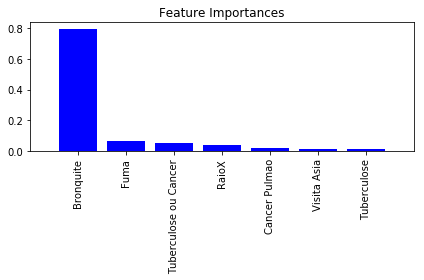

In [14]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X1k_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X1k_train.shape[1]), 
        importances[indices],
        color='blue', 
        align='center')

plt.xticks(range(X1k_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X1k_train.shape[1]])
plt.tight_layout()
plt.show()

#### 3.2.2 Cálculo e exibição de dados de perfomance de classificação

In [15]:
printScores("Random Forest", y1k_test, forest.predict(X1k_test))

Classification metrics from Random Forest
 - Accuracy: 83.33%
 - Precision: 77.40%
 - Recall: 86.92%


### 3.3 Árvore de Decisão

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                max_features='sqrt',
                                random_state=0)

#Treinamento com base de dados
clf1k = clf.fit(X1k_train, y1k_train)

#### 3.3.1 Exibição e plotagem de dados

 1) Bronquite                      0.812992
 2) Tuberculose ou Cancer          0.133766
 3) Fuma                           0.028481
 4) RaioX                          0.011039
 5) Visita Asia                    0.009771
 6) Cancer Pulmao                  0.002110
 7) Tuberculose                    0.001842


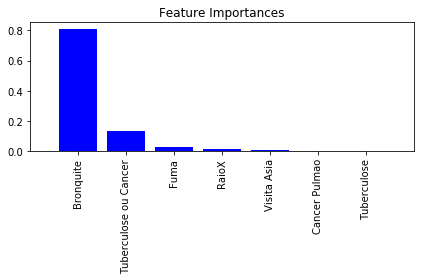

In [17]:
#Plotagem das importâncias das características da base de dados
importancesTree = clf1k.feature_importances_
indices = np.argsort(importancesTree)[::-1]
for f in range(X1k_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importancesTree[indices[f]]))
    
plt.title('Feature Importances')
plt.bar(range(X1k_train.shape[1]), 
        importancesTree[indices],
        color='blue', 
        align='center')

plt.xticks(range(X1k_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X1k_train.shape[1]])
plt.tight_layout()
plt.show()

#### 3.3.2 Cálculo e exibição de dados de perfomance de classificação

In [18]:
printScores("Decision Tree", y1k_test, clf.predict(X1k_test))

Classification metrics from Decision Tree
 - Accuracy: 83.67%
 - Precision: 77.93%
 - Recall: 86.92%


#### 3.3.3 Desenho da árvore de decisão

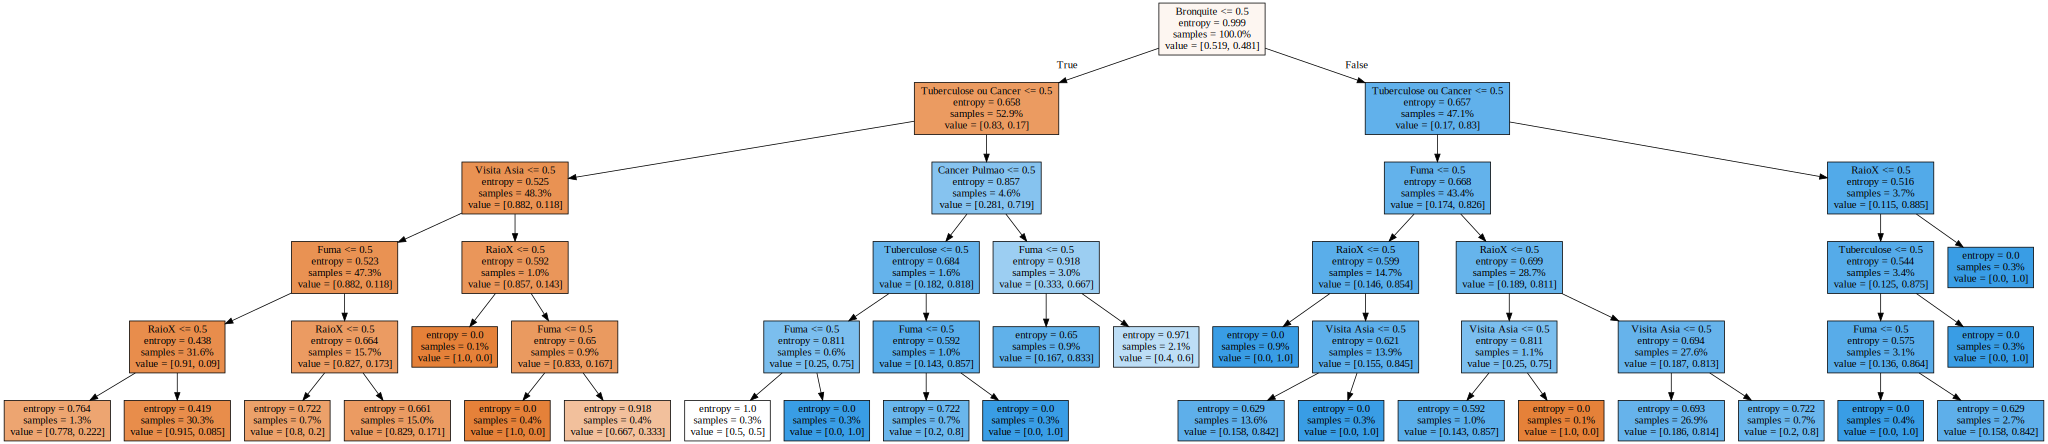

In [19]:
#Exportação da árvore de decisão de mil amostras
dot_data1k = tree.export_graphviz(clf1k, proportion=True, 
                                  feature_names=['Visita Asia', 'Fuma', 'Tuberculose', 
                                                 'Cancer Pulmao', 'Bronquite', 'Tuberculose ou Cancer', 
                                                 'RaioX'], out_file= None, filled = True)
graph1k = graphviz.Source(dot_data1k)

#Exportação da árvore em pdf
graph1k.render('tree1k')

#Plotagem da árvore de decisão
graph1k

***

## Questionário
***
##### 1) O quanto cada modelo se aproxima da rede bayesiana original ?

   * Naive Bayes: 83.33333333333334% 
   * Random Forest: 83.33333333333334%
   * Decision Tree: 83.66666666666667%
    
##### 2) O quanto o tamanho do dataset influencia na qualidade ?

   - Na seção 1.1, calculamos o erro acumulado para cada dataset com tamanho T num intervalo entre 100 e 1.000.000:
       * (T = 100) => E = 28
       * (T = 1.000) => E = 11
       * (T = 10.000) => E = 10
       * (T = 100.000) => E = 11
       * (T = 1.000.000) => E = 13
        
##### 3) Smoothing se faz necessário ?

   - Pode-se ver na comparação das seções 2.1 e 2.2 que o smoothing não se faz necessário para as amostras trabalhadas pelos modelos acima.

##### 4) Quem possui melhor comportamento: Naive Bayes ou Decision Tree ? 
   - _Decision Tree_ obteve uma precisão melhor em comparação com os outros dois algoritmos, com 0.33% a mais.

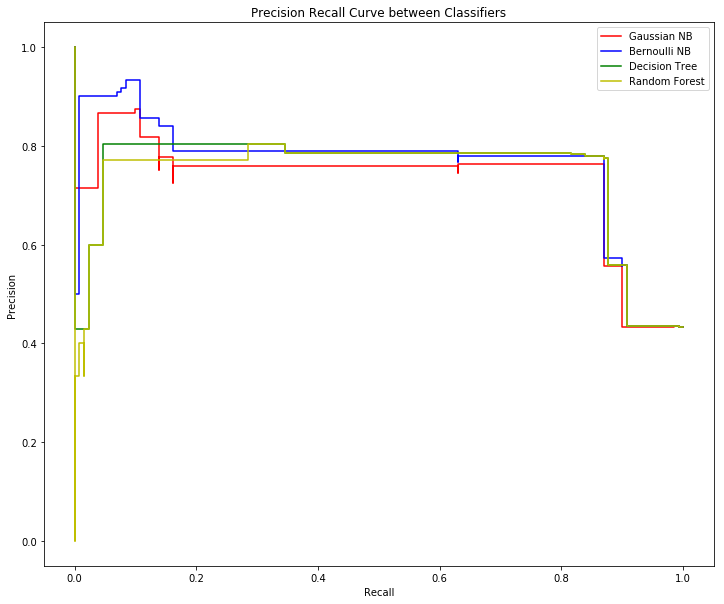

In [21]:
GaussianNB_prob = modelGaussian.predict_proba(X1k_test)
GaussianNB_prob_prec, GaussianNB_prob_recall, _ = precision_recall_curve(y1k_test, GaussianNB_prob[:,1])

BernoulliNB_prob = modelBernoulli.predict_proba(X1k_test)
BernoulliNB_prob_prec, BernoulliNB_prob_recall, _ = precision_recall_curve(y1k_test, BernoulliNB_prob[:,1])

clf_prob = clf.predict_proba(X1k_test)
clf_prob_prec, clf_prob_recall, _ = precision_recall_curve(y1k_test, clf_prob[:,1])

forest_prob = forest.predict_proba(X1k_test)
forest_prob_prec, forest_prob_recall, _ = precision_recall_curve(y1k_test, forest_prob[:,1])

plt.step(GaussianNB_prob_recall, GaussianNB_prob_prec, color='r', where='post')
plt.step(BernoulliNB_prob_recall, BernoulliNB_prob_prec, color='b', where='post')
plt.step(clf_prob_recall, clf_prob_prec, color='g', where='post')
plt.step(forest_prob_recall, forest_prob_prec, color='y', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve between Classifiers')
plt.legend(('Gaussian NB', 'Bernoulli NB', 'Decision Tree', 'Random Forest'))
plt.rcParams["figure.figsize"] = (14, 10)
plt.show()